Импортируем необходимые библиотеки

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

Прочитаем файл и проанализируем данные. Как можно видет Outcome явялется целевой переменной

In [6]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Как можно видеть из вывода в данных пропуски отсутствуют, поэтому дополнительной обработки не требуется

Рассчитываем количество, мат ожидание, вариацию, среднее отклонение, минимум, квантиль 25, квантиль 50, квантиль 75 и максимум

In [8]:
mean_values = {}
variance_values = {}
std_values = {}
quantile_25 = {}
quantile_50 = {}
quantile_75 = {}
min_values = {}
max_values = {}
count_values = {}
for column in df.columns:
    data = df[column]
    mean = sum(data)/len(data)
    mean_values[column] = mean
    variance = sum((x - mean)**2 for x in data)/(len(data)-1)
    variance_values[column] = variance
    count_values[column] = data.count()
    std_values[column] = sqrt(variance)
    quantile_25[column] = np.percentile(data, 25)
    quantile_50[column] = np.percentile(data, 50)
    quantile_75[column] = np.percentile(data, 75)
    min_values[column] = min(data)
    max_values[column] = max(data)
stats_df = pd.DataFrame({
    'count': count_values,
    'mean': mean_values,
    'variance': variance_values,
    'std_dev': std_values,
    'min': min_values,
    'quantile_25': quantile_25,
    'quantile_50': quantile_50,
    'quantile_75': quantile_75,
    'max': max_values
})
stats_df = stats_df.T
stats_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
variance,11.354056,1022.248314,374.647271,254.473245,13281.180078,62.159984,0.109779,138.303046,0.227483
std_dev,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
quantile_25,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
quantile_50,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
quantile_75,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Строим гистограммы распределения для всех признаков и целевой переменной

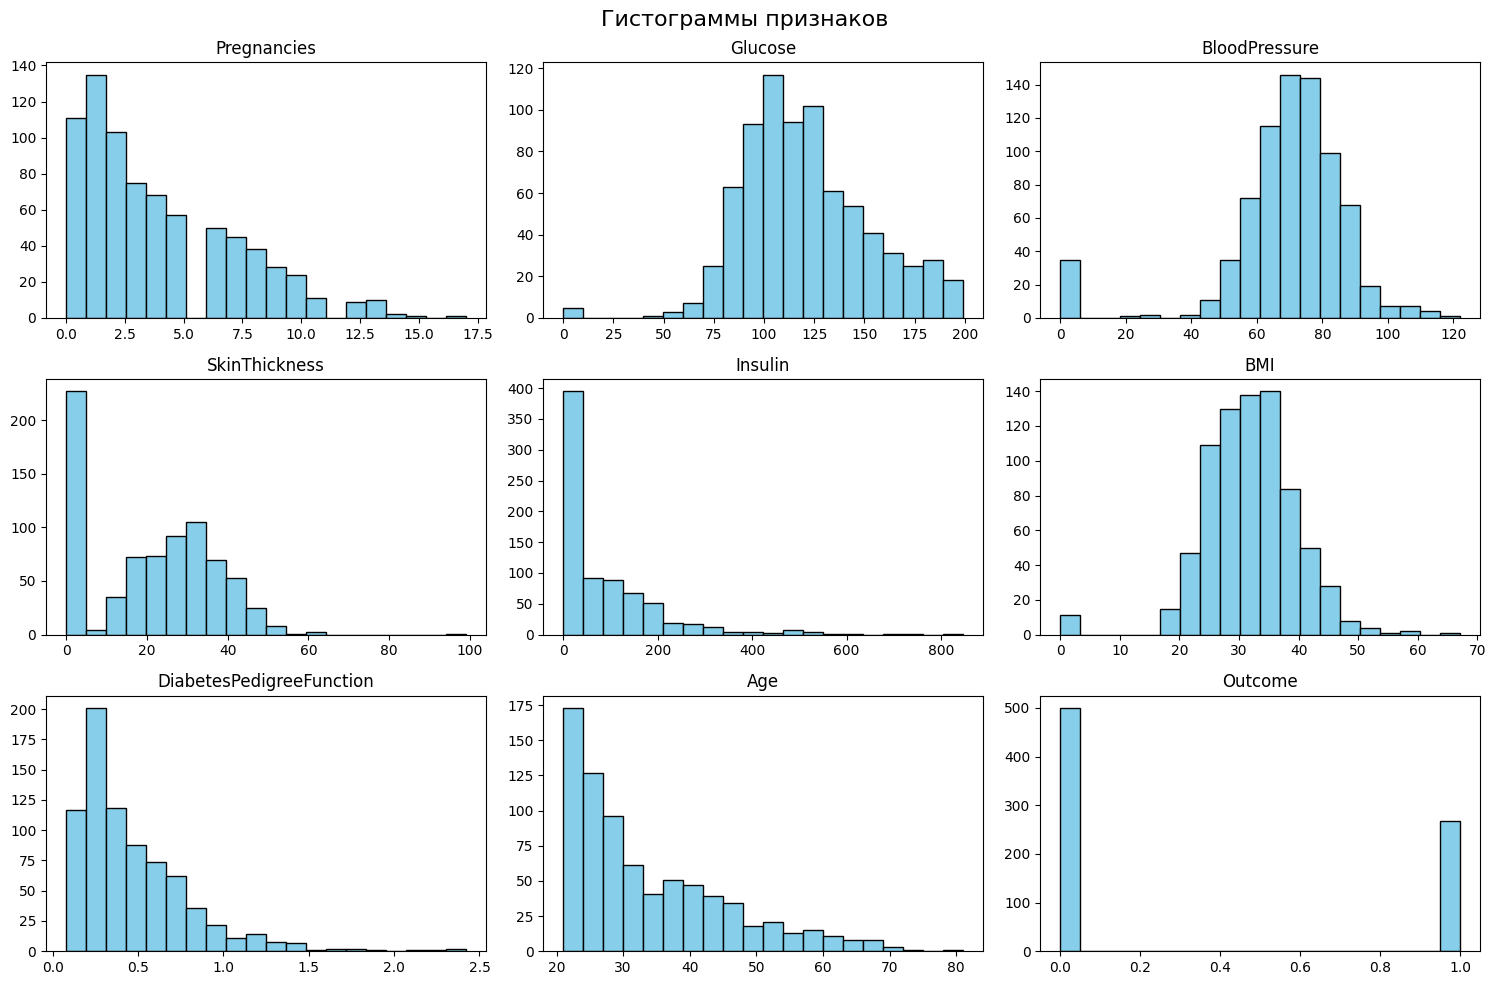

In [9]:
df.hist(bins=20, figsize=(15,10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы признаков', fontsize=16)
plt.tight_layout()
plt.show()

Строим матрицу корреляции для того, чтобы определить какие признаки имеют сильную взаимосвязь между собой. Если связь сильная значит признаки имеют мультиколлинеарность.

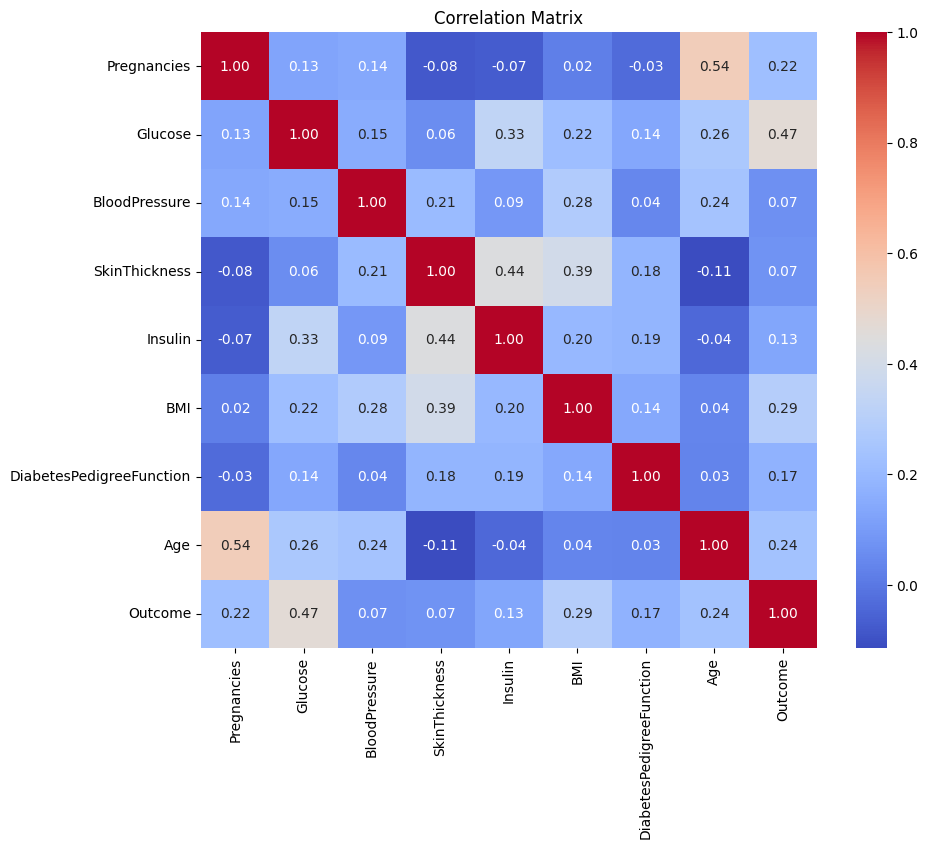

In [10]:
def show_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix")
    plt.show()

show_correlation_matrix(df)

Применяем Мин-Макс нормализацию, чтобы наши значения располагались в диапазоне от 0 до 1

In [11]:
df_min = df.min()
df_max = df.max()
df_normalised = (df - df_min)/(df_max - df_min)
df_normalised.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X = df_normalised.drop(columns=['Outcome'])
Y = df_normalised['Outcome']
np.random.seed(42)
indices = np.random.permutation(len(X))
test_size = 0.2
test_samples = int(len(X) * test_size)
train_indices = indices[test_samples:]
test_indices = indices[:test_samples]
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
Y_train = Y.iloc[train_indices]
Y_test = Y.iloc[test_indices]
print(f"Количество элементов в обучающей выборке X: {X_train.shape}")
print(f"Количество элементов в тестовой выборке X: {X_test.shape}")
print(f"Количество элементов в обучающей выборке Y: {Y_train.shape}")
print(f"Количество элементов в тестовой выборке Y: {Y_test.shape}")

print("Распределение классов в обучающей выборке:")
print(Y_train.value_counts())
print(Y_test.value_counts())

Количество элементов в обучающей выборке X: (615, 8)
Количество элементов в тестовой выборке X: (153, 8)
Количество элементов в обучающей выборке Y: (615,)
Количество элементов в тестовой выборке Y: (153,)
Распределение классов в обучающей выборке:
Outcome
0.0    402
1.0    213
Name: count, dtype: int64
Outcome
0.0    98
1.0    55
Name: count, dtype: int64


In [13]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [14]:
def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))